
K- Means Clustering:
    where,
    k >> A no.that we decide
    Mean >> avg
    Cluster >> A group of data points
    
    
K- Means is an unsupervised machine learning algorithm.


K- Means is a centroid based algorithm.
Purpose >>  Cohesion - Grouping data points that are similar to each other. (points from the same cluster)
            & Separtion - separating data points that are different from each other. (points from the differnt cluster)
    
Why we use?
    We do not have ground truth (target values) and we wnat to segment data points into cluster.

In [ ]:
wcss (within cluster sum of square) >> sum of square of distances of points from the respective centroids
Elbow Graph >> elbow shaped graph that helps us decide the optimal value of k.
Silhouette score >> Whichever value of k has highest silhouette score that would be decided for k value. (-1 to +1)

In [4]:
# from IPython.display import Image
# Image('img.png')

silhouette score = bi-ai / max(bi,ai)

WCSS = summetion(xi - yi)^2

K means Algorithm Steps:
    1. Select a value of k (no. clusters/ no. of centroids). default value is 2
    2. Algorithm selects k random centroids
    3. calculates the distance between centroid & all data points.
    4. Assign each data point to its closest centroid.
    5. Update the value of centroids >> Mean of cluster's datapoints.
    6. Keep iterating over untill there is no change in centroid value. (no movement of data points between clusters)

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [8]:
dict_country = {'Country':['USA','Canada','France','UK','Germany','Austrelia'],
                'Lattitude':[44.97,62.40,46.75,54.01,51.15,-25.45],
                'Longitude':[-103.77,-96.80,2.40,-2.53,10.40,133.11],
                'Language':['English','Canadian','French0','English','German','English']}

df=pd.DataFrame(dict_country)
df

,Country,Lattitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,Canadian
2,France,46.75,2.40,French0
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Austrelia,-25.45,133.11,English


<AxesSubplot: xlabel='Lattitude', ylabel='Longitude'>

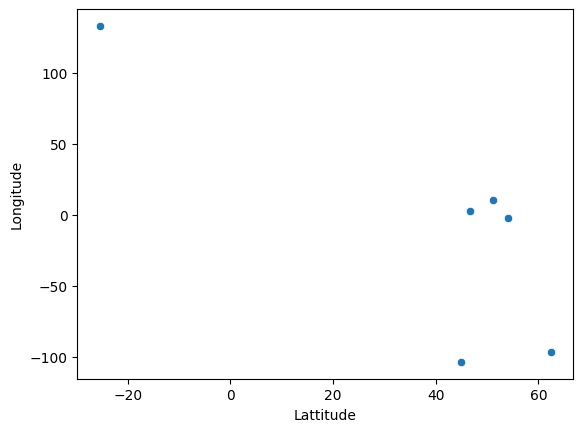

In [10]:
sns.scatterplot(x = df['Lattitude'],y = df['Longitude'])

In [11]:
x = df[['Lattitude','Longitude']]
x

,Lattitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [12]:
std_scalar = StandardScaler()
x_scaled = std_scalar.fit_transform(x)
x = pd.DataFrame(x_scaled,columns=x.columns)
x

,Lattitude,Longitude
0,0.204344,-1.193114
1,0.798128,-1.104870
2,0.264983,0.151062
3,0.512308,0.088645
4,0.414877,0.252347
5,-2.194639,1.805930


### Model Training

In [13]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(x)

KMeans(n_clusters=3)

In [15]:
wcss = kmeans_model.inertia_
wcss

0.22487761024739528

In [16]:
y_pred = kmeans_model.fit_predict(x)
y_pred

array([0, 0, 2, 2, 2, 1])

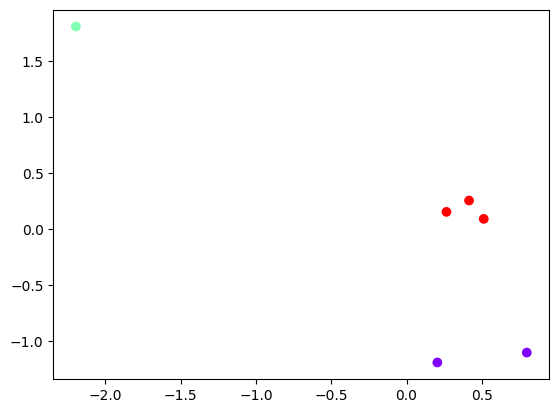

In [17]:
plt.scatter(x['Lattitude'],x['Longitude'],c = y_pred,cmap = 'rainbow')

In [18]:
#provides the coordinates of the cluter centroids
kmeans_model.cluster_centers_

array([[ 0.50123584, -1.14899226],
       [-2.19463851,  1.80593003],
       [ 0.39738895,  0.16401816]])

In [19]:
wcss_list = []
for k in range(1,7):
    kmeans_model_new = KMeans(n_clusters=k)
    kmeans_model_new.fit(x)
    wcss_value = kmeans_model_new.inertia_
    wcss_list.append(wcss_value)
    print(f'for k == {k}, wcss is {wcss_value}')



for k == 1, wcss is 12.0
for k == 2, wcss is 2.3066142396506644
for k == 3, wcss is 0.22487761024739528
for k == 4, wcss is 0.04469440405562376
for k == 5, wcss is 0.016363388749074958
for k == 6, wcss is 0.0


In [20]:
silhouette_score_list=[]
for k in range(2,6):
    kmeans_model_new=KMeans(n_clusters=k)
    y_pred_new=kmeans_model_new.fit_predict(x)
    silhouette_coefficient=silhouette_score(x,y_pred_new)
    silhouette_score_list.append(silhouette_coefficient)
    print(f'for k == {k},& silhouette score is {silhouette_coefficient}')
    

for k == 2,& silhouette score is 0.6085613412443698
for k == 3,& silhouette score is 0.6080096531702182
for k == 4,& silhouette score is 0.42079618158679155
for k == 5,& silhouette score is 0.05686042220603446


Text(1.0, 1.0, 'Elbow Curve')

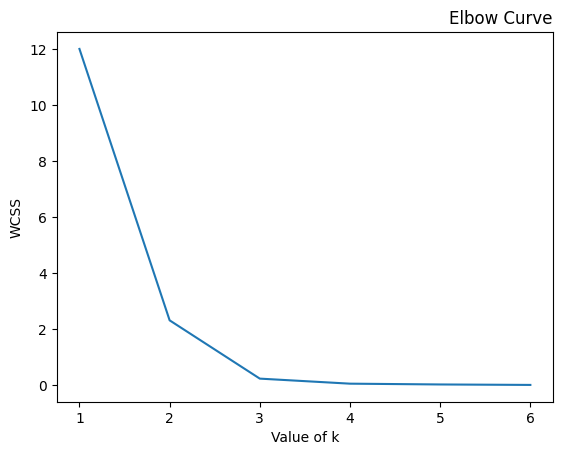

In [21]:
k=range(1,7)
plt.plot(k,wcss_list)
plt.xlabel('Value of k')
plt.ylabel('WCSS')
plt.title('Elbow Curve',loc='right')

Text(1.0, 1.0, 'Silhoutte score')

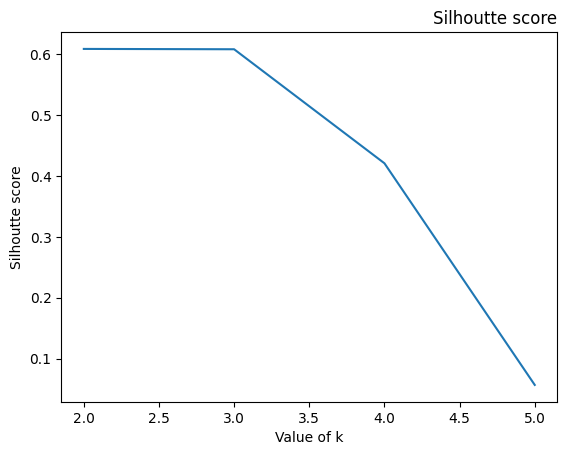

In [22]:
k=range(2,6,1)
plt.plot(k,silhouette_score_list)
plt.xlabel('Value of k')
plt.ylabel('Silhoutte score')
plt.title('Silhoutte score',loc='right')